In [54]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
from sklearn import metrics

In [55]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [56]:
x_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [57]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

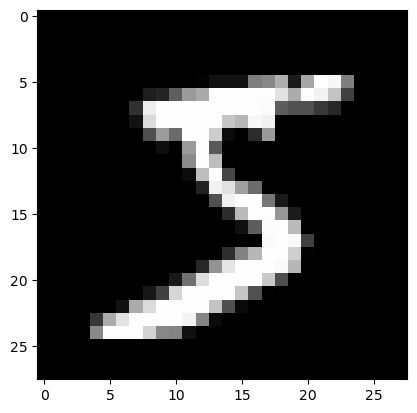

In [58]:
plt.imshow(x_train[0], cmap='gray') # imshow() function which simply displays an image.
plt.show() 

In [59]:
x_train = x_train.reshape(x_train.shape[0], 784)
x_test = x_test.reshape(x_test.shape[0], 784)
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255


In [60]:
# cmap is responsible for mapping a specific colormap to the values found in the array that
#you passed as the first argument.
# This is because of the format that all the images in the dataset have:
# 1. All the images are grayscale, meaning they only contain black, white and grey.
# 2. The images are 28 pixels by 25 pixels in size (28x28).

print(x_train[0])



# image data is just an array of digits. You can almost make out a 5 from the pattern of the digits in the array.
# Array of 28 values

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [61]:
# Reshape the data to fit the model
print("X_train shape", x_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", x_test.shape)
print("y_test shape", y_test.shape)

X_train shape (60000, 784)
y_train shape (60000,)
X_test shape (10000, 784)
y_test shape (10000,)


In [62]:
#x_train = x_train.reshape(60000, 784)
#x_test = x_test.reshape(10000, 784)

In [63]:
#x_train = x_train.astype('float32')

In [64]:
#x_test = x_test.astype('float32')
#x_train /= 255 # Each image has Intensity from 0 to 255
#x_test /= 255

In [65]:
# Convert class vectors to binary class matrices
num_classes = 10
y_train = np.eye(num_classes)[y_train] # Return a 2-D array with ones on the diagonal and zeros elsewhere.
y_test = np.eye(num_classes)[y_test] # f your particular categories is present then it mark as 1 else 0 in remain row


In [66]:
# Define the model architecture
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,))) # Input cosist of 784 Neuron ie 784 input, 512 in the hidden layer
model.add(Dropout(0.2)) # DROP OUT RATIO 20%

model.add(Dense(512, activation='relu')) #returns a sequence of another vectors of dimension 512
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax')) # 10 neurons ie output node in the output layer

In [67]:
model.compile(loss='categorical_crossentropy', # for a multi-class classification problem
optimizer=RMSprop(),
metrics=['accuracy'])

In [68]:
batch_size = 128 # batch_size argument is passed to the layer to define a batch size for the inputs.
epochs = 20
history = model.fit(x_train, y_train,
batch_size=batch_size,
epochs=epochs,
verbose=1, # verbose=1 will show you an animated progress bar eg. [==========]
validation_data=(x_test, y_test)) # Using validation_data means you are providing the training set and validation set yourself,
# 60000image/128=469 batch each


Epoch 1/20
469/469 [==============================] - 3s 6ms/step - loss: 0.2587 - accuracy: 0.9208 - val_loss: 0.1014 - val_accuracy: 0.9666
Epoch 2/20
469/469 [==============================] - 3s 5ms/step - loss: 0.1059 - accuracy: 0.9681 - val_loss: 0.0841 - val_accuracy: 0.9736
Epoch 3/20
469/469 [==============================] - 2s 5ms/step - loss: 0.0739 - accuracy: 0.9771 - val_loss: 0.0700 - val_accuracy: 0.9800
Epoch 4/20
469/469 [==============================] - 3s 5ms/step - loss: 0.0566 - accuracy: 0.9824 - val_loss: 0.0755 - val_accuracy: 0.9769
Epoch 5/20
469/469 [==============================] - 2s 5ms/step - loss: 0.0484 - accuracy: 0.9846 - val_loss: 0.0652 - val_accuracy: 0.9815
Epoch 6/20
469/469 [==============================] - 3s 5ms/step - loss: 0.0395 - accuracy: 0.9875 - val_loss: 0.0664 - val_accuracy: 0.9811
Epoch 7/20
469/469 [==============================] - 2s 5ms/step - loss: 0.0343 - accuracy: 0.9898 - val_loss: 0.0670 - val_accuracy: 0.9829
Epoch 

In [69]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.0894065797328949
Test accuracy: 0.984499990940094


In [70]:
predictions = model.predict(x_test)
predicted_labels = np.argmax(predictions, axis=1)

313/313 [==============================] - 0s 1ms/step


In [71]:
# Display some of the predicted labels
print("Predicted Labels:", predicted_labels[:10])
print("True Labels:", np.argmax(y_test[:10], axis=1))

Predicted Labels: [7 2 1 0 4 1 4 9 5 9]
True Labels: [7 2 1 0 4 1 4 9 5 9]


In [72]:
# Calculate and display classification report
print("Classification Report:")
print(metrics.classification_report(np.argmax(y_test, axis=1), predicted_labels))

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.99      0.99      1032
           3       0.97      0.99      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.99      0.97      0.98       892
           6       0.99      0.99      0.99       958
           7       0.98      0.99      0.98      1028
           8       0.98      0.98      0.98       974
           9       0.99      0.97      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000

